# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


>  (tmdb-movies) This data set contains information near to 11,000 movies collected from The Movie Database (TMDb) , the data is collected for movies from 1960 to 2015.

columns
1.  id: movie id
2.  imdb_id: movie id on imdb
3.  popularity: popularity of the movie in numbers
4.  budget: movie budget
5.  revenue: movie revenue
6.  original_title: movie title
7.  cast: movie cast
8.  homepage: link for the web page for the movie
9.  director: movie director
10. tagline: secondary title for the movie 
11. keywords: movie'keywords
12. overview: describtion of the movie
13. runtime: movie runtime 
14. genres: movie gener
15. production_companies: movie production companies
16. release_date: the date of releasing the movie 
17. vote_count: count of the people
18. vote_average: vote average 
19. release_year: the year of releasing the movie
20. budget_adj: budget according the Inflation rate
21. revenue_adj: revenue according the Inflation rate
### Question(s) for Analysis
1. what is the relation between revenue and (budget, average votes, popularity) ?
2. what is the relation between number of movies and the release year ?
3. What is the most appearing production companies in the popular movies ?
4. who are the top 10 directors with the highest revenues ?

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [56]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.3MB/s eta 0:00:01   19% |██████▍                         | 2.1MB 20.0MB/s eta 0:00:01    38% |████████████▍                   | 4.0MB 20.2MB/s eta 0:00:01    47% |███████████████▎                | 5.0MB 19.8MB/s eta 0:00:01    66% |█████████████████████▏          | 6.9MB 19.5MB/s eta 0:00:01    75% |████████████████████████        | 7.8MB 17.9MB/s eta 0:00:01    93% |██████████████████████████████  | 9.8MB 20.8MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.8MB/s eta 0:00:01   45% |██████████████▋                 | 6.1MB 22.1MB/s eta 0:00:01    53% |█████████████████▎              | 7.2MB 22.2MB/s eta 0:00:01    62% |███████████████████▉            | 8.3MB 22.1MB/s eta 0:00:01    77% |████████████████████████▋       | 10.3MB 17.8MB/s eta 0:00:01    83% |██████████████████████████▉     | 11.2MB 21.2MB/s eta 0:00:01    98% |███████████████████████████████▍| 13.1MB 22.7MB/s eta 0:00:01
tensorflow 1.3.0 requires ten

<a id='wrangling'></a>
## Data Wrangling




In [90]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [91]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [92]:
df.shape

(10866, 21)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [94]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning


In [95]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['id','imdb_id','homepage','tagline','overview','keywords','release_date'], axis=1 ,inplace=True)
#these columns will not effect our data analysis so we are not gonna use them in our analysis 

In [96]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [97]:
df.fillna(df.mean() ,inplace=True)

In [98]:
df.drop_duplicates(inplace = True)

In [99]:
df.dropna(subset=['cast','director','genres'] , inplace = True)
# rows with the NUN values in thses columns represent less than 1.5 %

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10731 non-null float64
budget                  10731 non-null int64
revenue                 10731 non-null int64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
budget_adj              10731 non-null float64
revenue_adj             10731 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [101]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [102]:
def relation (data_frame , x_axis, y_axis, kinds, size1 ,size2) :
    if kinds == 'bar' :
        data_frame.plot(kind = kinds , figsize=(size1,size2))
        plt.xlabel(x_axis)
        plt.ylabel(y_axis)
        plt.title('relation between {} and {}'.format(x_axis, y_axis));
    else:
        data_frame.plot(x= x_axis , y= y_axis , kind = kinds , figsize=(size1,size2))
        plt.xlabel(x_axis)
        plt.ylabel(y_axis)
        plt.title('relation between {} and {}'.format(x_axis, y_axis));

    return relation

<a id='eda'></a>
## Exploratory Data Analysis

### Q1
### the relation between revenue and (budget, average votes, popularity)

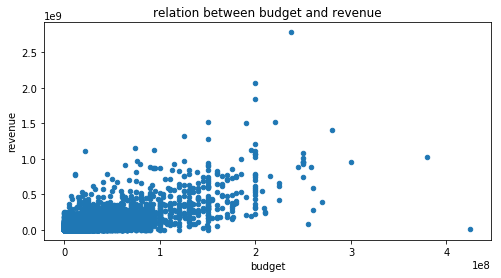

In [103]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
relation(df,'budget','revenue','scatter',8,4);

In [104]:
#it is a positive relation that the movie revenue icreases with the its budget

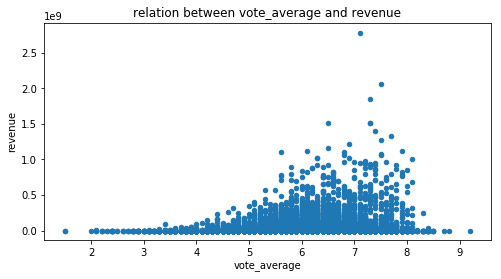

In [105]:
relation(df,'vote_average','revenue','scatter',8,4);

In [106]:
#there is a high probability for the movie to get a higher revenue as the average vote icreases 

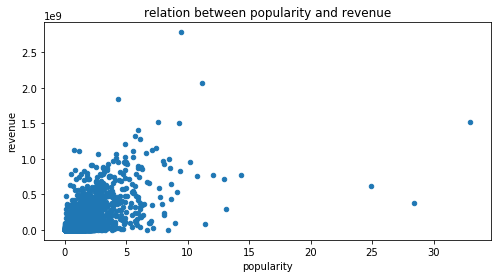

In [107]:
relation(df,'popularity','revenue','scatter',8,4);

In [108]:
### we can ignore the 3 values in popularity more than 15 
### as popularity icreases the revenue icreases too

### Q2
### the relation between number of movies and the release year

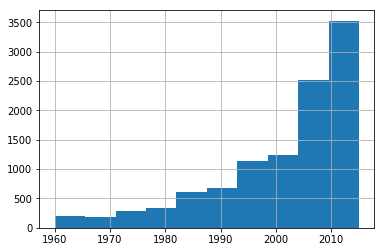

In [109]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.release_year.hist();

In [110]:
#number of released movies per year icreases with the year that means the economics of cinema icreased alot 

### Q3
### What is the most appearing production companies in the popular movies?

In [111]:
df2 = df.copy()
df2.dropna(subset=['production_companies'] , inplace = True)

In [112]:
popular = df2[df2['popularity'] > df2['popularity'].median()]
popular_movies = popular.sort_values(by = 'popularity' , ascending = False )
pop = popular_movies['production_companies'].value_counts().head(10)

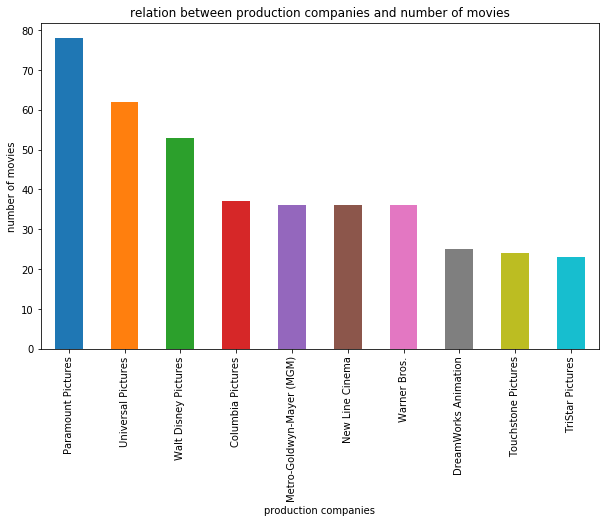

In [113]:
relation(pop,'production companies','number of movies','bar',10,6);

In [114]:
#these are the most companies with high probability of making a popular movie hence a high revenue 

### Q4
###  who are the top 10 directors with the highest mean revenues ?

In [115]:
#we get the mean revenue of each director to avoid the differnce in number of movies for each director 
mean_rev = df.groupby('director').mean()
top_10_mean_revenue = mean_rev[['revenue']].sort_values(by = 'revenue', ascending = False).head(10)
top_10_mean_revenue

,revenue
director,
Kyle Balda|Pierre Coffin,1.156731e+09
Lee Unkrich,1.063172e+09
Andrew Adamson|Kelly Asbury|Conrad Vernon,9.198388e+08
Andrew Stanton|Lee Unkrich,8.646260e+08
Pete Docter,8.537086e+08
David Yates,8.308591e+08
Chris Miller|Raman Hui,7.989582e+08
Roger Allers|Rob Minkoff,7.882418e+08
Colin Trevorrow,7.587683e+08


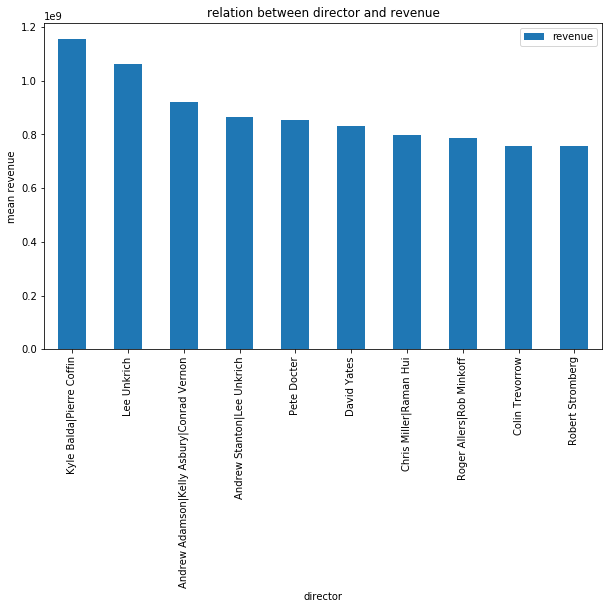

In [116]:
top_10_mean_revenue.plot( kind='bar', figsize = (10,6))
plt.xlabel('director')
plt.ylabel('mean revenue')
plt.title('relation between director and revenue');

In [117]:
#these directors have a very high probability of making a succesful movie with very high revenue

<a id='conclusions'></a>
## Conclusions
1. most movies with high revenue have a midlle budget 
2. the movies with high average votes have a big chance to get a high revenue
3. as the popularity of the film icreases, its probability to get a higher revenue icreases
4. number of produced films per year has icreased to a high level therefore we can say it is a very succesful work
5. for a succesful movie we need a quite high budget , good content whhich could be known by average votes , good marketing to the film which is represented in popularity , one of the top 10 directors and one of the top 10 production companies. with these factors the movie has a very high probability to be successful and get a high revenue 

### limitations 
1. budget and revenue columns contain a very big number of zeroes.
2. the missing data for production companies is big
4. no data for the duration of movie production which could effect its success 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])